**Task 3: Customer Segmentation / Clustering**

Davies-Bouldin Index: 0.8967286185530712
Silhouette Score: 0.3605519306620684


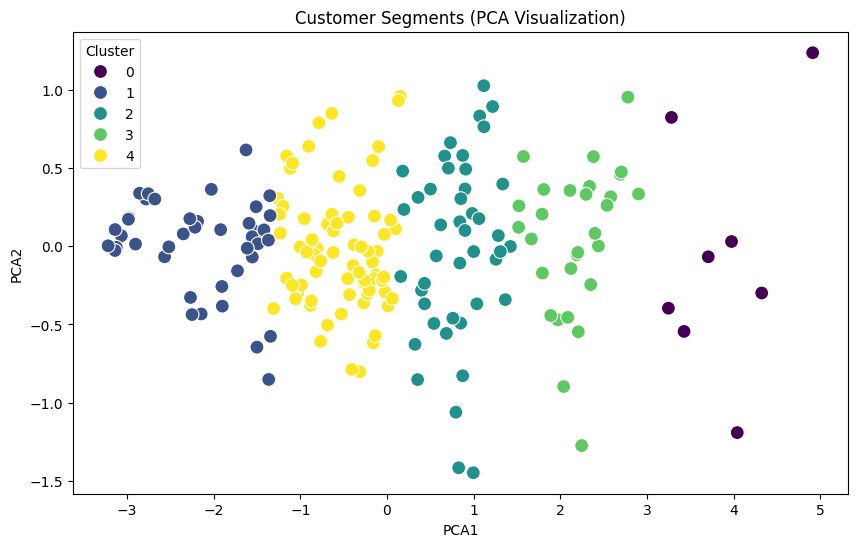

In [7]:
#import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#load datasets
customers = pd.read_csv("C:/Users/91949/Downloads/Customers - Customers.csv")
products = pd.read_csv("C:/Users/91949/Downloads/Products.csv")
transactions = pd.read_csv("C:/Users/91949/Downloads/Transactions - Transactions.csv")

#aggregate data for clustering
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count'
}).rename(columns={'TransactionID': 'TransactionCount'}).reset_index()

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

#KMeans clustering
n_clusters = 5  # You can adjust this based on the elbow method or other criteria
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

#calculate clustering metrics
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')
print(f'Silhouette Score: {silhouette_avg}')

#visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_features['PCA1'] = pca_features[:, 0]
customer_features['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()